#### Загрузка набора данных

In [1058]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import featuretools as ft
import re
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


df = pd.read_csv("../data/car_price_prediction.csv")

df = df.drop(columns=["ID"])

df

Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399          LEXUS   RX 450        2010       Jeep   
1      16621  1018      CHEVROLET  Equinox        2011       Jeep   
2       8467     -          HONDA      FIT        2006  Hatchback   
3       3607   862           FORD   Escape        2011       Jeep   
4      11726   446          HONDA      FIT        2014  Hatchback   
...      ...   ...            ...      ...         ...        ...   
19232   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km        6.0   
1                   No    Petrol             3  192000 km        6.0   
2                   No    Petrol           1.3  200000 km        4.0   
3                  Yes    Hybrid           2.5  168966 km        4.0   
4                  Yes    Petrol           1.3   91901 km        4.0   
...                ...       ...           ...        ...        ...   
19232              Yes       CNG     2.0 Turbo  300000 km        4.0   
19233              Yes    Petrol           2.4  161600 km        4.0   
19234              Yes    Diesel             2  116365 km        4.0   
19235              Yes    Diesel             2   51258 km        4.0   
19236              Yes    Hybrid           2.4  186923 km        4.0   

      Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0         Automatic          4x4  04-May        Left wheel  Silver       12  
1         Tiptronic          4x4  04-May        Left wheel   Black        8  
2          Variator        Front  04-May  Right-hand drive   Black        2  
3         Automatic          4x4  04-May        Left wheel   White        0  
4         Automatic        Front  04-May        Left wheel  Silver        4  
...             ...          ...     ...               ...     ...      ...  
19232        Manual         Rear  02-Mar        Left wheel  Silver        5  
19233     Tiptronic        Front  04-May        Left wheel     Red        8  
19234     Automatic        Front  04-May        Left wheel    Grey        4  
19235     Automatic        Front  04-May        Left wheel   Black        4  
19236     Automatic        Front  04-May        Left wheel   White       12  

[19237 rows x 17 columns]

#### Анализ датасета и очистка данных

In [1059]:
df.dtypes

Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [1060]:
df["Engine volume"] = df["Engine volume"].str.replace("Turbo", "")
df["Engine volume"] = pd.to_numeric(df["Engine volume"])
df["Engine volume"].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [1061]:
df["Mileage"] = df["Mileage"].str.replace("km", "")
df["Mileage"] = df["Mileage"].astype("int64")
df["Mileage"].unique()

array([186005, 192000, 200000, ..., 140607, 307325, 186923])

In [1062]:
df["Levy"] = df["Levy"].replace("-", "0")
df["Levy"] = df["Levy"].astype("int64")
df["Levy"].unique()

array([ 1399,  1018,     0,   862,   446,   891,   761,   751,   394,
        1053,  1055,  1079,   810,  2386,  1850,   531,   586,  1249,
        2455,   583,  1537,  1288,   915,  1750,   707,  1077,  1486,
        1091,   650,   382,  1436,  1194,   503,  1017,  1104,   639,
         629,   919,   781,   530,   640,   765,   777,   779,   934,
         769,   645,  1185,  1324,   830,  1187,  1111,   760,   642,
        1604,  1095,   966,   473,  1138,  1811,   988,   917,  1156,
         687, 11714,   836,  1347,  2866,  1646,   259,   609,   697,
         585,   475,   690,   308,  1823,  1361,  1273,   924,   584,
        2078,   831,  1172,   893,  1872,  1885,  1266,   447,  2148,
        1730,   730,   289,   502,   333,  1325,   247,   879,  1342,
        1327,  1598,  1514,  1058,   738,  1935,   481,  1522,  1282,
         456,   880,   900,   798,  1277,   442,  1051,   790,  1292,
        1047,   528,  1211,  1493,  1793,   574,   930,  1998,   271,
         706,  1481,

In [1063]:
df["Cylinders"] = df["Cylinders"].astype("int64")
df["Cylinders"].unique()

array([ 6,  4,  8,  1, 12,  3,  2, 16,  5,  7,  9, 10, 14])

In [1064]:
df["Doors"].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [1065]:
df["Doors"] = df["Doors"].map(
    {"02-Mar": "Двухдверный", "04-May": "Четырехдверный", ">5": "Многодверный"}
)
df["Doors"].unique()

array(['Четырехдверный', 'Двухдверный', 'Многодверный'], dtype=object)

In [1066]:
sorted_df = df.sort_values(by="Price")
sorted_df["Price"].unique()

array([       1,        3,        6, ...,   627220,   872946, 26307500])

In [1067]:
print(f"Количество строк до удаления некорректных значений: {len(df)}")
df = df[df["Price"] >= 500]
print(f"Количество строк после удаления некорректных значений: {len(df)}")

Количество строк до удаления некорректных значений: 19237
Количество строк после удаления некорректных значений: 17574


In [1068]:
sorted_df = df.sort_values(by="Price")
sorted_df["Price"].unique()

array([     500,      549,      600, ...,   627220,   872946, 26307500])

In [1069]:
sorted_df = df.sort_values(by="Prod. year")
sorted_df["Prod. year"].unique()

array([1943, 1953, 1957, 1964, 1965, 1968, 1973, 1974, 1977, 1978, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020])

#### Ручной синтез признаков.

In [1070]:
df["Age"] = 2020 - df["Prod. year"]
df = df.drop("Prod. year", axis=1)
sorted_df = df.sort_values(by="Age")
sorted_df["Age"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 42, 43, 46, 47, 52, 55, 56, 63, 67, 77])

In [1071]:
df

Price  Levy   Manufacturer    Model   Category Leather interior  \
0      13328  1399          LEXUS   RX 450       Jeep              Yes   
1      16621  1018      CHEVROLET  Equinox       Jeep               No   
2       8467     0          HONDA      FIT  Hatchback               No   
3       3607   862           FORD   Escape       Jeep              Yes   
4      11726   446          HONDA      FIT  Hatchback              Yes   
...      ...   ...            ...      ...        ...              ...   
19231   5802  1055  MERCEDES-BENZ    E 350      Sedan              Yes   
19232   8467     0  MERCEDES-BENZ  CLK 200      Coupe              Yes   
19233  15681   831        HYUNDAI   Sonata      Sedan              Yes   
19234  26108   836        HYUNDAI   Tucson       Jeep              Yes   
19235   5331  1288      CHEVROLET  Captiva       Jeep              Yes   

      Fuel type  Engine volume  Mileage  Cylinders Gear box type Drive wheels  \
0        Hybrid            3.5   186005          6     Automatic          4x4   
1        Petrol            3.0   192000          6     Tiptronic          4x4   
2        Petrol            1.3   200000          4      Variator        Front   
3        Hybrid            2.5   168966          4     Automatic          4x4   
4        Petrol            1.3    91901          4     Automatic        Front   
...         ...            ...      ...        ...           ...          ...   
19231    Diesel            3.5   107800          6     Automatic         Rear   
19232       CNG            2.0   300000          4        Manual         Rear   
19233    Petrol            2.4   161600          4     Tiptronic        Front   
19234    Diesel            2.0   116365          4     Automatic        Front   
19235    Diesel            2.0    51258          4     Automatic        Front   

                Doors             Wheel   Color  Airbags  Age  
0      Четырехдверный        Left wheel  Silver       12   10  
1      Четырехдверный        Left wheel   Black        8    9  
2      Четырехдверный  Right-hand drive   Black        2   14  
3      Четырехдверный        Left wheel   White        0    9  
4      Четырехдверный        Left wheel  Silver        4    6  
...               ...               ...     ...      ...  ...  
19231  Четырехдверный        Left wheel    Grey       12    7  
19232     Двухдверный        Left wheel  Silver        5   21  
19233  Четырехдверный        Left wheel     Red        8    9  
19234  Четырехдверный        Left wheel    Grey        4   10  
19235  Четырехдверный        Left wheel   Black        4   13  

[17574 rows x 17 columns]

#### Очистка дубликатов и пропущенных значений

In [1072]:
df.duplicated().sum()

np.int64(2773)

In [1073]:
df.drop_duplicates(inplace=True)

In [1074]:
df.isna().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Age                 0
dtype: int64

#### Очистка выбросов

In [1075]:
df.dtypes

Price                 int64
Levy                  int64
Manufacturer         object
Model                object
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
Age                   int64
dtype: object

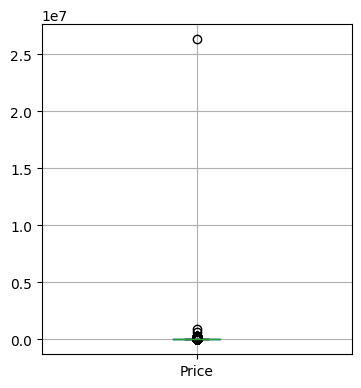

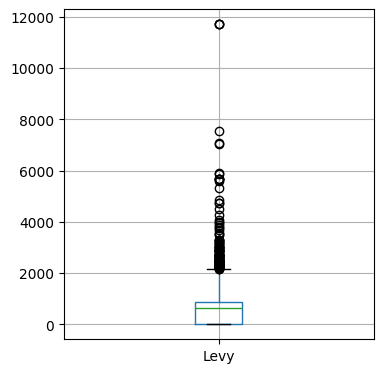

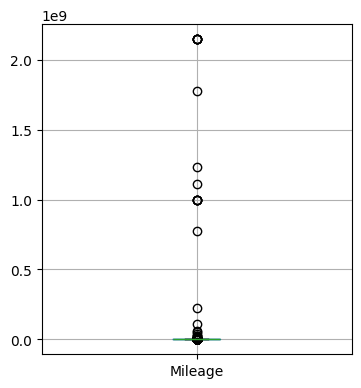

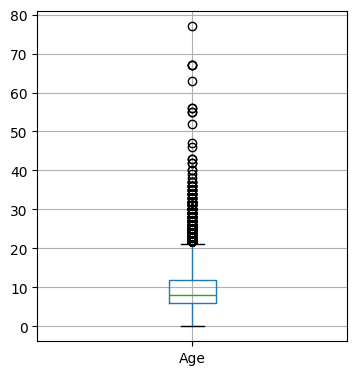

In [1076]:
numeric_features_with_outliers = [
    "Price",
    "Levy",
    "Mileage",
    "Age",
]

i = 1
for col in numeric_features_with_outliers:
    plt.figure(figsize=(4, 30))
    plt.subplot(6, 1, i)
    df.boxplot(column=col)
    i += 1

In [1077]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print(f"Количество строк до удаления выбросов: {len(df)}")

for column in numeric_features_with_outliers:
    df = remove_outliers(df, column)

print(f"Количество строк после удаления выбросов: {len(df)}")

Количество строк до удаления выбросов: 14801
Количество строк после удаления выбросов: 12597


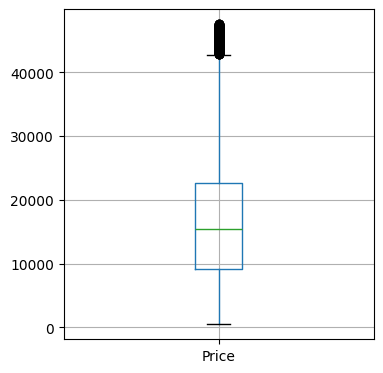

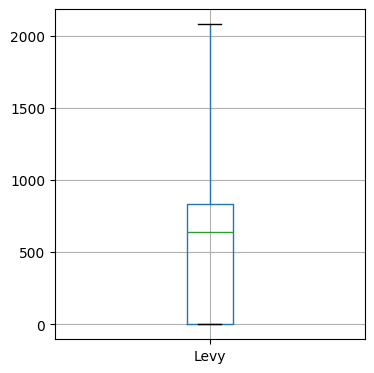

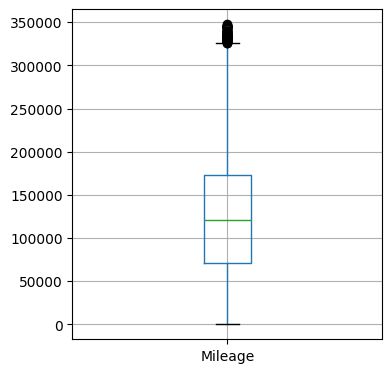

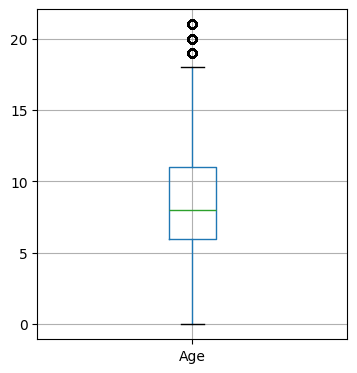

In [1078]:
i = 1
for col in numeric_features_with_outliers:
    plt.figure(figsize=(4, 30))
    plt.subplot(6, 1, i)
    df.boxplot(column=col)
    i += 1

#### Разбиение на выборки

In [1079]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print("Размеры выборок:")
print(f"Обучающая выборка: {train_df.shape[0]} записей")
print(f"Тестовая выборка: {test_df.shape[0]} записей")

Размеры выборок:
Обучающая выборка: 10077 записей
Тестовая выборка: 2520 записей


#### Дискретизация числовых признаков

In [1080]:
train_df.dtypes

Price                 int64
Levy                  int64
Manufacturer         object
Model                object
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
Age                   int64
dtype: object

In [1081]:
numeric_features_for_discritization = ["Age"]

def discretize_features(df, features, bins=4, labels=["Новый", "Средний", "Старый", "Очень старый"]):
    for feature in features:
        try:
            df[f"{feature}_bin"] = pd.cut(df[feature], bins=bins, labels=labels)  # type: ignore
        except Exception as e:
            print(f"Ошибка при дискретизации признака {feature}: {e}")
    return df


train_df = discretize_features(train_df, numeric_features_for_discritization)
test_df = discretize_features(test_df, numeric_features_for_discritization)

train_df

Price  Levy Manufacturer      Model   Category Leather interior  \
14829   6743   966       DAEWOO    Lacetti      Sedan              Yes   
3632   20005   583      HYUNDAI    Elantra      Sedan              Yes   
4982   13172   836        DODGE    Caliber  Hatchback               No   
16758   8781   584      HYUNDAI    Elantra      Sedan              Yes   
6875   25086     0       TOYOTA      Prius  Hatchback               No   
...      ...   ...          ...        ...        ...              ...   
18201  10349     0         AUDI         A4      Sedan              Yes   
7436    2038   765          KIA     Avella      Sedan              Yes   
7728   13485   843       TOYOTA      Prius  Hatchback               No   
1136   15677     0         FORD     Fiesta      Sedan               No   
10640  16308   751          KIA  Optima EX      Sedan              Yes   

      Fuel type  Engine volume  Mileage  Cylinders Gear box type Drive wheels  \
14829    Diesel            2.0    62227          4     Automatic        Front   
3632     Petrol            1.6    94479          4     Automatic        Front   
4982     Petrol            2.0   114000          4      Variator        Front   
16758    Petrol            1.8    60000          4     Tiptronic        Front   
6875     Hybrid            1.8        0          4     Automatic        Front   
...         ...            ...      ...        ...           ...          ...   
18201    Petrol            2.4   150000          6        Manual          4x4   
7436     Petrol            2.0   125621          4     Automatic        Front   
7728     Hybrid            1.5   212000          4      Variator        Front   
1136     Petrol            1.6    74800          4     Automatic        Front   
10640    Petrol            2.4    92000         12     Tiptronic        Front   

                Doors       Wheel   Color  Airbags  Age  Age_bin  
14829  Четырехдверный  Left wheel   White        4   11   Старый  
3632   Четырехдверный  Left wheel     Red        4    9  Средний  
4982   Четырехдверный  Left wheel  Silver        8   10  Средний  
16758  Четырехдверный  Left wheel    Grey       10    6  Средний  
6875   Четырехдверный  Left wheel  Silver       12    5    Новый  
...               ...         ...     ...      ...  ...      ...  
18201  Четырехдверный  Left wheel    Grey        4   13   Старый  
7436   Четырехдверный  Left wheel  Silver       12    5    Новый  
7728   Четырехдверный  Left wheel  Silver        8   12   Старый  
1136   Четырехдверный  Left wheel  Silver        8    4    Новый  
10640  Четырехдверный  Left wheel  Silver        8    7  Средний  

[10077 rows x 18 columns]

#### Унитарное кодирование категориальных признаков

In [1082]:
train_df.dtypes

Price                  int64
Levy                   int64
Manufacturer          object
Model                 object
Category              object
Leather interior      object
Fuel type             object
Engine volume        float64
Mileage                int64
Cylinders              int64
Gear box type         object
Drive wheels          object
Doors                 object
Wheel                 object
Color                 object
Airbags                int64
Age                    int64
Age_bin             category
dtype: object

In [1083]:
categorical_features_for_encoding = [
    "Leather interior",
    "Category",
    "Fuel type",
    "Gear box type",
    "Drive wheels",
    "Doors",
    "Wheel",
    "Age_bin",
]

train_df = pd.get_dummies(train_df, columns=categorical_features_for_encoding)
test_df = pd.get_dummies(test_df, columns=categorical_features_for_encoding)

train_df

Price  Levy Manufacturer      Model  Engine volume  Mileage  Cylinders  \
14829   6743   966       DAEWOO    Lacetti            2.0    62227          4   
3632   20005   583      HYUNDAI    Elantra            1.6    94479          4   
4982   13172   836        DODGE    Caliber            2.0   114000          4   
16758   8781   584      HYUNDAI    Elantra            1.8    60000          4   
6875   25086     0       TOYOTA      Prius            1.8        0          4   
...      ...   ...          ...        ...            ...      ...        ...   
18201  10349     0         AUDI         A4            2.4   150000          6   
7436    2038   765          KIA     Avella            2.0   125621          4   
7728   13485   843       TOYOTA      Prius            1.5   212000          4   
1136   15677     0         FORD     Fiesta            1.6    74800          4   
10640  16308   751          KIA  Optima EX            2.4    92000         12   

        Color  Airbags  Age  ...  Drive wheels_Rear  Doors_Двухдверный  \
14829   White        4   11  ...              False              False   
3632      Red        4    9  ...              False              False   
4982   Silver        8   10  ...              False              False   
16758    Grey       10    6  ...              False              False   
6875   Silver       12    5  ...              False              False   
...       ...      ...  ...  ...                ...                ...   
18201    Grey        4   13  ...              False              False   
7436   Silver       12    5  ...              False              False   
7728   Silver        8   12  ...              False              False   
1136   Silver        8    4  ...              False              False   
10640  Silver        8    7  ...              False              False   

       Doors_Многодверный  Doors_Четырехдверный  Wheel_Left wheel  \
14829               False                  True              True   
3632                False                  True              True   
4982                False                  True              True   
16758               False                  True              True   
6875                False                  True              True   
...                   ...                   ...               ...   
18201               False                  True              True   
7436                False                  True              True   
7728                False                  True              True   
1136                False                  True              True   
10640               False                  True              True   

       Wheel_Right-hand drive  Age_bin_Новый  Age_bin_Средний  Age_bin_Старый  \
14829                   False          False            False            True   
3632                    False          False             True           False   
4982                    False          False             True           False   
16758                   False          False             True           False   
6875                    False           True            False           False   
...                       ...            ...              ...             ...   
18201                   False          False            False            True   
7436                    False           True            False           False   
7728                    False          False            False            True   
1136                    False           True            False           False   
10640                   False          False             True           False   

       Age_bin_Очень старый  
14829                 False  
3632                  False  
4982                  False  
16758                 False  
6875                  False  
...                     ...  
18201                 False  
7436                  False  
7728                  False  
1136                  False  
10640        

#### Масштабирование признаков

In [1084]:
train_df.dtypes

Price                         int64
Levy                          int64
Manufacturer                 object
Model                        object
Engine volume               float64
Mileage                       int64
Cylinders                     int64
Color                        object
Airbags                       int64
Age                           int64
Leather interior_No            bool
Leather interior_Yes           bool
Category_Cabriolet             bool
Category_Coupe                 bool
Category_Goods wagon           bool
Category_Hatchback             bool
Category_Jeep                  bool
Category_Limousine             bool
Category_Microbus              bool
Category_Minivan               bool
Category_Pickup                bool
Category_Sedan                 bool
Category_Universal             bool
Fuel type_CNG                  bool
Fuel type_Diesel               bool
Fuel type_Hybrid               bool
Fuel type_Hydrogen             bool
Fuel type_LPG               

In [1085]:
scaler = StandardScaler()

numeric_features_for_stardartization = [
    "Price",
    "Levy",
    "Engine volume",
    "Mileage",
    "Cylinders",
    "Airbags",
    "Age",
]

train_df[numeric_features_for_stardartization] = scaler.fit_transform(
    train_df[numeric_features_for_stardartization]
)
test_df[numeric_features_for_stardartization] = scaler.transform(
    test_df[numeric_features_for_stardartization]
)

train_df

Price      Levy Manufacturer      Model  Engine volume   Mileage  \
14829 -0.936428  0.909873       DAEWOO    Lacetti      -0.212078 -0.855905   
3632   0.288147  0.076376      HYUNDAI    Elantra      -0.757467 -0.422001   
4982  -0.342793  0.626963        DODGE    Caliber      -0.212078 -0.159374   
16758 -0.748245  0.078552      HYUNDAI    Elantra      -0.484772 -0.885866   
6875   0.757313 -1.192368       TOYOTA      Prius      -0.484772 -1.693079   
...         ...       ...          ...        ...            ...       ...   
18201 -0.603461 -1.192368         AUDI         A4       0.333312  0.324954   
7436  -1.370875  0.472450          KIA     Avella      -0.212078 -0.003030   
7728  -0.313891  0.642196       TOYOTA      Prius      -0.893814  1.159074   
1136  -0.111488 -1.192368         FORD     Fiesta      -0.757467 -0.686753   
10640 -0.053223  0.441983          KIA  Optima EX       0.333312 -0.455352   

       Cylinders   Color   Airbags       Age  ...  Drive wheels_Rear  \
14829  -0.399820   White -0.681491  0.446831  ...              False   
3632   -0.399820     Red -0.681491  0.013523  ...              False   
4982   -0.399820  Silver  0.330763  0.230177  ...              False   
16758  -0.399820    Grey  0.836890 -0.636438  ...              False   
6875   -0.399820  Silver  1.343017 -0.853091  ...              False   
...          ...     ...       ...       ...  ...                ...   
18201   1.520116    Grey -0.681491  0.880138  ...              False   
7436   -0.399820  Silver  1.343017 -0.853091  ...              False   
7728   -0.399820  Silver  0.330763  0.663484  ...              False   
1136   -0.399820  Silver  0.330763 -1.069745  ...              False   
10640   7.279922  Silver  0.330763 -0.419784  ...              False   

       Doors_Двухдверный  Doors_Многодверный  Doors_Четырехдверный  \
14829              False               False                  True   
3632               False               False                  True   
4982               False               False                  True   
16758              False               False                  True   
6875               False               False                  True   
...                  ...                 ...                   ...   
18201              False               False                  True   
7436               False               False                  True   
7728               False               False                  True   
1136               False               False                  True   
10640              False               False                  True   

       Wheel_Left wheel  Wheel_Right-hand drive  Age_bin_Новый  \
14829              True                   False          False   
3632               True                   False          False   
4982               True                   False          False   
16758              True                   False          False   
6875               True                   False           True   
...                 ...                     ...            ...   
18201              True                   False          False   
7436               True                   False           True   
7728               True                   False          False   
1136               True                   False           True   
10640              True                   False          False   

       Age_bin_Средний  Age_bin_Старый  Age_bin_Очень старый  
14829            False            True                 False  
3632              True           False                 False  
4982              True           False                 False  
16758             True           False                 False  
6875             False           False                 False  
...                ...             ...                   ...  
18201            False            True                 False  
7436             False           False                 False  
7728   

#### Конструирование признаков с помощью Featuretools

In [1086]:
es = ft.EntitySet(id="car_data")
es = es.add_dataframe(dataframe_name="train", dataframe=train_df, index="id")
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="train",
    max_depth=1,
)

c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index id not found in dataframe, creating new integer column
  warnings.warn(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\user\source\repos\mai_pi-33_zakharov\.venv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling 

In [1087]:
feature_defs

[<Feature: Price>,
 <Feature: Levy>,
 <Feature: Manufacturer>,
 <Feature: Model>,
 <Feature: Engine volume>,
 <Feature: Mileage>,
 <Feature: Cylinders>,
 <Feature: Color>,
 <Feature: Airbags>,
 <Feature: Age>,
 <Feature: Leather interior_No>,
 <Feature: Leather interior_Yes>,
 <Feature: Category_Cabriolet>,
 <Feature: Category_Coupe>,
 <Feature: Category_Goods wagon>,
 <Feature: Category_Hatchback>,
 <Feature: Category_Jeep>,
 <Feature: Category_Limousine>,
 <Feature: Category_Microbus>,
 <Feature: Category_Minivan>,
 <Feature: Category_Pickup>,
 <Feature: Category_Sedan>,
 <Feature: Category_Universal>,
 <Feature: Fuel type_CNG>,
 <Feature: Fuel type_Diesel>,
 <Feature: Fuel type_Hybrid>,
 <Feature: Fuel type_Hydrogen>,
 <Feature: Fuel type_LPG>,
 <Feature: Fuel type_Petrol>,
 <Feature: Fuel type_Plug-in Hybrid>,
 <Feature: Gear box type_Automatic>,
 <Feature: Gear box type_Manual>,
 <Feature: Gear box type_Tiptronic>,
 <Feature: Gear box type_Variator>,
 <Feature: Drive wheels_4x4>,
